In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('AHU-5 Supply Fan - driven_fan - bearing 1- 12_2_21 - 19_12.csv')
df

,timestamp,12/02/21 - 07:00:05pm Driven Fan 3I,12/02/21 - 07:00:05pm Driven Fan 3P,12/02/21 - 07:00:05pm Driven Fan 3A
0,0.000000,-0.349746,-0.150099,0.339716
1,0.000048,-0.464385,-0.518294,0.115831
2,0.000096,-0.255337,-0.113684,-0.299568
3,0.000144,0.122299,0.094015,-0.367003
4,0.000192,0.266610,0.204609,-0.318450
...,...,...,...,...
83307,3.998800,0.278748,0.166845,0.450309
83308,3.998848,0.153319,-0.348358,0.368038
83309,3.998896,-0.115072,-0.024670,0.010633
83310,3.998944,-0.225665,0.338130,-0.330588


<IPython.core.display.Javascript object>


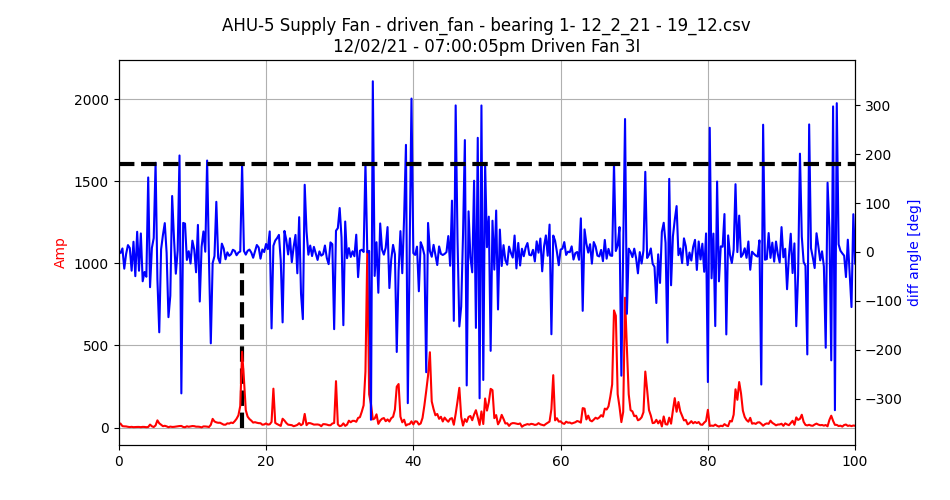

In [20]:
%matplotlib notebook
import matplotlib.pyplot as plt
from scipy.signal import medfilt
f = np.fft.fftfreq(df.shape[0], df.iloc[1, 0])
freq = np.fft.fft(df.iloc[:, 1])

fig, ax1 = plt.subplots(figsize=[9.5, 5])
ax1.vlines(16.8, 0, 1000, linestyles='dashed', color='k', linewidth=3)
ax1.plot(f[f>0], np.abs(freq)[f>0], color='r')
ax1.set_ylabel('Amp', color='r')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(f[f>0][:-1], np.diff(np.angle(freq)[f>0] / np.pi * 180), color='b')
# ax2.plot(f[f>0][:-1], np.diff(medfilt(np.angle(freq)[f>0] / np.pi * 180, 7)), color='g')
ax2.set_ylabel('diff angle [deg]', color='b')
ax2.set_xlim([0, 100])
ax2.hlines(180, 0, 100, linestyles='dashed', color='k', linewidth=3)
ax2.set_title('AHU-5 Supply Fan - driven_fan - bearing 1- 12_2_21 - 19_12.csv\n12/02/21 - 07:00:05pm Driven Fan 3I')
plt.show()